<a href="https://colab.research.google.com/github/Diljot-Singh/ML-practice-projects/blob/Diljot/MinimizingChurnInSubscription/Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
#### Importing Libraries ####

import pandas as pd
import numpy as np
import random
import seaborn as sn
import matplotlib.pyplot as plt

dataset = pd.read_csv('new_churn_data.csv')


In [54]:
dataset.describe()

,user,churn,age,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,cc_disliked,cc_liked,cc_application_begin,app_downloaded,web_user,ios_user,android_user,registered_phones,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,left_for_two_month_plus,left_for_one_month,reward_rate,is_referred
count,26996.000000,26996.000000,26996.000000,26996.000000,26996.000000,26996.000000,26996.000000,26996.000000,26996.000000,26996.000000,26996.000000,26996.000000,26996.000000,26996.000000,26996.000000,26996.000000,26996.000000,26996.000000,26996.000000,26996.000000,26996.000000,26996.00000,26996.000000,26996.000000,26996.000000
mean,35418.535302,0.413913,32.219921,3.342051,0.307045,28.066677,3.273967,0.073789,92.639502,0.050637,0.013113,8.199067,0.952511,0.606164,0.393984,0.587235,0.420988,0.001296,0.018818,0.018188,0.004890,0.17347,0.018077,0.907819,0.318010
std,20319.620354,0.492542,9.964838,9.131992,1.055488,42.221432,8.953651,0.437331,88.868773,0.871431,0.238175,12.497770,0.212685,0.488608,0.488640,0.492340,0.912884,0.035984,0.135883,0.133633,0.069756,0.37866,0.133232,0.751991,0.465712
min,1.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,17808.750000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.200000,0.000000
50%,35745.500000,0.000000,30.000000,0.000000,0.000000,9.000000,0.000000,0.000000,65.000000,0.000000,0.000000,4.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.780000,0.000000
75%,53236.750000,1.000000,37.000000,1.000000,0.000000,43.000000,1.000000,0.000000,164.000000,0.000000,0.000000,11.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.530000,1.000000
max,69658.000000,1.000000,91.000000,65.000000,29.000000,1067.000000,63.000000,29.000000,522.000000,65.000000,27.000000,263.000000,1.000000,1.000000,1.000000,1.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,4.000000,1.000000


In [55]:
## Data Preparation
user_identifier = dataset['user']
dataset = dataset.drop(columns = ['user'])

In [56]:
# One-Hot Encoding
dataset.housing.value_counts()
#dataset.groupby('housing')['churn'].nunique().reset_index()
dataset = pd.get_dummies(dataset, drop_first=True)
dataset.columns
#dataset = dataset.drop(columns = ['housing_na', 'zodiac_sign_na', 'payment_type_na'])


Index(['churn', 'age', 'deposits', 'withdrawal', 'purchases_partners',
       'purchases', 'cc_taken', 'cc_recommended', 'cc_disliked', 'cc_liked',
       'cc_application_begin', 'app_downloaded', 'web_user', 'ios_user',
       'android_user', 'registered_phones', 'waiting_4_loan', 'cancelled_loan',
       'received_loan', 'rejected_loan', 'left_for_two_month_plus',
       'left_for_one_month', 'reward_rate', 'is_referred', 'housing_R',
       'housing_na', 'payment_type_Monthly', 'payment_type_Semi-Monthly',
       'payment_type_Weekly', 'payment_type_na', 'zodiac_sign_Aries',
       'zodiac_sign_Cancer', 'zodiac_sign_Capricorn', 'zodiac_sign_Gemini',
       'zodiac_sign_Leo', 'zodiac_sign_Libra', 'zodiac_sign_Pisces',
       'zodiac_sign_Sagittarius', 'zodiac_sign_Scorpio', 'zodiac_sign_Taurus',
       'zodiac_sign_Virgo', 'zodiac_sign_na'],
      dtype='object')

In [57]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset.drop(columns = 'churn'), dataset['churn'],
                                                    test_size = 0.2,
                                                    random_state = 0)

In [58]:
# Balancing the Training Set
#y_train.value_counts()

#pos_index = y_train[y_train.values == 1].index
#neg_index = y_train[y_train.values == 0].index

#if len(pos_index) > len(neg_index):
#    higher = pos_index
#    lower = neg_index
#else:
#    higher = neg_index
#    lower = pos_index



#random.seed(0)
#higher = np.random.choice(higher, size=len(lower))
#lower = np.asarray(lower)
#new_indexes = np.concatenate((lower, higher))

#X_train = X_train.loc[new_indexes,]
#y_train = y_train[new_indexes]

In [59]:

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
X_test2 = pd.DataFrame(sc_X.transform(X_test))
X_train2.columns = X_train.columns.values
X_test2.columns = X_test.columns.values
X_train2.index = X_train.index.values
X_test2.index = X_test.index.values
X_train = X_train2
X_test = X_test2

In [60]:
X_train

,age,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,cc_disliked,cc_liked,cc_application_begin,app_downloaded,web_user,ios_user,android_user,registered_phones,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,left_for_two_month_plus,left_for_one_month,reward_rate,is_referred,housing_R,housing_na,payment_type_Monthly,payment_type_Semi-Monthly,payment_type_Weekly,payment_type_na,zodiac_sign_Aries,zodiac_sign_Cancer,zodiac_sign_Capricorn,zodiac_sign_Gemini,zodiac_sign_Leo,zodiac_sign_Libra,zodiac_sign_Pisces,zodiac_sign_Sagittarius,zodiac_sign_Scorpio,zodiac_sign_Taurus,zodiac_sign_Virgo,zodiac_sign_na
11570,-0.629054,-0.258361,-0.290940,0.487171,-0.255882,-0.165814,-0.472506,-0.058110,-0.069033,-0.258910,0.222075,-1.243301,-0.808376,0.838944,-0.463718,-0.036031,-0.139113,-0.136672,-0.069563,2.192473,-0.135967,-0.147919,-0.685504,-0.829683,-1.022195,3.020713,-0.314073,-0.493755,-0.409009,-0.282966,-0.310232,6.310642,-0.29547,-0.310859,-0.295377,-0.292309,-0.289124,-0.293427,-0.299619,-0.313539,-0.293985
14315,-0.729144,-0.367346,-0.290940,1.307537,-0.367002,-0.165814,1.582293,-0.058110,-0.069033,-0.179132,0.222075,0.804310,1.237048,-1.191975,1.706263,-0.036031,-0.139113,-0.136672,-0.069563,2.192473,-0.135967,1.272398,-0.685504,1.205279,-1.022195,-0.331048,-0.314073,-0.493755,-0.409009,-0.282966,-0.310232,-0.158462,-0.29547,-0.310859,-0.295377,-0.292309,-0.289124,3.408003,-0.299619,-0.313539,-0.293985
11695,-0.629054,-0.367346,-0.290940,-0.614464,-0.367002,-0.165814,-0.932870,-0.058110,-0.069033,-0.578023,0.222075,-1.243301,-0.808376,0.838944,-0.463718,-0.036031,-0.139113,-0.136672,-0.069563,-0.456106,-0.135967,-0.546139,-0.685504,1.205279,-1.022195,-0.331048,-0.314073,2.025295,-0.409009,-0.282966,-0.310232,-0.158462,-0.29547,-0.310859,-0.295377,-0.292309,-0.289124,-0.293427,-0.299619,-0.313539,-0.293985
16711,-1.029415,-0.367346,-0.290940,-0.216000,-0.367002,-0.165814,-0.955327,-0.058110,-0.069033,-0.578023,0.222075,-1.243301,-0.808376,0.838944,-0.463718,-0.036031,-0.139113,-0.136672,-0.069563,-0.456106,-0.135967,-0.944359,-0.685504,-0.829683,0.978287,-0.331048,-0.314073,-0.493755,-0.409009,-0.282966,-0.310232,-0.158462,-0.29547,-0.310859,-0.295377,-0.292309,-0.289124,-0.293427,-0.299619,-0.313539,3.401534
19766,-0.428873,-0.367346,-0.290940,-0.661342,-0.367002,-0.165814,0.279798,1.094277,-0.069033,-0.578023,0.222075,0.804310,-0.808376,0.838944,-0.463718,-0.036031,-0.139113,-0.136672,-0.069563,-0.456106,-0.135967,0.914000,-0.685504,-0.829683,0.978287,-0.331048,-0.314073,-0.493755,-0.409009,-0.282966,-0.310232,-0.158462,-0.29547,-0.310859,3.385503,-0.292309,-0.289124,-0.293427,-0.299619,-0.313539,-0.293985
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13123,-1.129505,-0.367346,-0.290940,-0.614464,-0.367002,-0.165814,-1.033926,-0.058110,-0.069033,-0.657801,0.222075,-1.243301,-0.808376,0.838944,-0.463718,-0.036031,-0.139113,-0.136672,-0.069563,-0.456106,-0.135967,-1.209839,-0.685504,-0.829683,0.978287,-0.331048,-0.314073,-0.493755,-0.409009,3.533988,-0.310232,-0.158462,-0.29547,-0.310859,-0.295377,-0.292309,-0.289124,-0.293427,-0.299619,-0.313539,-0.293985
19648,1.873202,-0.367346,-0.290940,-0.661342,-0.367002,-0.165814,-1.045154,-0.058110,-0.069033,-0.657801,-4.502982,0.804310,-0.808376,-1.191975,-0.463718,-0.036031,-0.139113,-0.136672,-0.069563,-0.456106,-0.135967,-1.209839,-0.685504,-0.829683,0.978287,-0.331048,-0.314073,-0.493755,-0.409009,-0.282966,-0.310232,-0.158462,-0.29547,-0.310859,-0.295377,-0.292309,-0.289124,-0.293427,-0.299619,-0.313539,-0.293985
9845,-0.128603,-0.040392,0.648524,-0.169122,-0.033641,-0.165814,-0.629703,-0.058110,-0.069033,-0.099353,0.222075,-1.243301,1.237048,-1.191975,-0.463718,-0.036031,-0.139113,-0.136672,-0.069563,-0.456106,-0.135967,-1.209839,-0.685504,1.205279,-1.022195,-0.331048,-0.314073,-0.493755,-0.409009,3.533988,-0.310232,-0.158462,-0.295

In [61]:
#### Model Building ####
# Fitting Model to the Training Set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [62]:
# Predicting Test Set
y_pred = classifier.predict(X_test)

Test Data Accuracy: 0.6431


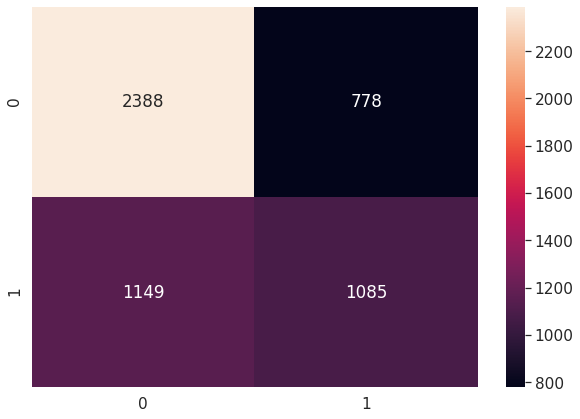

In [63]:
# Evaluating Results
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
cm = confusion_matrix(y_test, y_pred)
accuracy_score(y_test, y_pred)
precision_score(y_test, y_pred) # tp / (tp + fp)
recall_score(y_test, y_pred) # tp / (tp + fn)
f1_score(y_test, y_pred)

df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='g')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred))

In [64]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("LR Accuracy: %0.3f (+/- %0.3f)" % (accuracies.mean(), accuracies.std() * 2))

LR Accuracy: 0.651 (+/- 0.018)


In [65]:
# Analyzing Coefficients
pd.concat([pd.DataFrame(X_train.columns, columns = ["features"]),
           pd.DataFrame(np.transpose(classifier.coef_), columns = ["coef"])
           ],axis = 1)


,features,coef
0,age,-0.169537
1,deposits,0.296425
2,withdrawal,0.050379
3,purchases_partners,-0.778741
4,purchases,-0.432980
5,cc_taken,0.070401
6,cc_recommended,0.075465
7,cc_disliked,-0.013435
8,cc_liked,0.000113
9,cc_application_begin,0.027456


In [66]:
#### Feature Selection ####


## Feature Selection
# Recursive Feature Elimination
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

# Model to Test
classifier = RandomForestClassifier()
# Select Best X Features
rfe = RFE(classifier, 20)
rfe = rfe.fit(X_train, y_train)
# summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)
X_train.columns[rfe.support_]


[ True  True False  True  True False  True False False  True False  True
  True  True  True False False False False  True False  True  True  True
  True False False  True  True False  True False False  True False False
 False False False  True False]
[ 1  1  8  1  1 13  1 17 20  1 19  1  1  1  1 22 16 15 21  1 18  1  1  1
  1  3  7  1  1 12  1 14  5  1 11  2  9 10  6  1  4]


Index(['age', 'deposits', 'purchases_partners', 'purchases', 'cc_recommended',
       'cc_application_begin', 'web_user', 'ios_user', 'android_user',
       'registered_phones', 'left_for_two_month_plus', 'reward_rate',
       'is_referred', 'housing_R', 'housing_na', 'payment_type_Weekly',
       'payment_type_na', 'zodiac_sign_Cancer', 'zodiac_sign_Leo',
       'zodiac_sign_Virgo'],
      dtype='object')

In [67]:
# Fitting Model to the Training Set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train[X_train.columns[rfe.support_]], y_train)

# Predicting Test Set
y_pred = classifier.predict(X_test[X_train.columns[rfe.support_]])


              precision    recall  f1-score   support

           0       0.73      0.82      0.77      3166
           1       0.69      0.57      0.62      2234

    accuracy                           0.71      5400
   macro avg       0.71      0.69      0.70      5400
weighted avg       0.71      0.71      0.71      5400



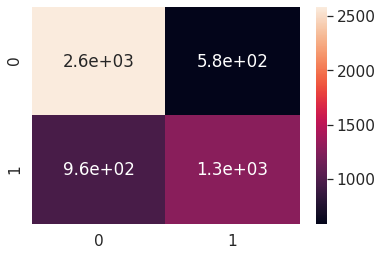

In [72]:
# Evaluating Results
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred)
sn.heatmap(cm, annot = True)
print(classification_report(y_test, y_pred))

In [69]:
#### End of Model ####


# Formatting Final Results
final_results = pd.concat([y_test, user_identifier], axis = 1).dropna()
final_results['predicted_churn'] = y_pred
final_results = final_results[['user', 'churn', 'predicted_churn']].reset_index(drop=True)

In [70]:
final_results

,user,churn,predicted_churn
0,61353,1.0,1
1,67679,0.0,0
2,21269,0.0,0
3,69531,0.0,0
4,25997,0.0,0
...,...,...,...
5395,22377,0.0,0
5396,24291,1.0,1
5397,23740,0.0,1
5398,47663,1.0,0
